# Notebook for piNMF on an synthetic dataset

### DOCKER PULL AND LAUNCH NOTEBOOK

docker pull juanmoriano/indirectneuro_jm:latest

docker run --name [CONTAINER_NAME] -e GRANT_SUDO=yes -e ROOT=TRUE -e PASSWORD="jupyter" -dit -p 9191:8888 -v [Volume_DATA] juanmoriano/indirectneuro_jm /bin/bash

docker exec -ti -u root [CONTAINER_NAME] bash

jupyter notebook --port=8888 --ip=0.0.0.0 --allow-root --no-browser

Work on NMF_indNeuro kernel - already present -

And make sure to work on directory containing FunctionalHALS.py SHALS.py piNMF.py -see below-

### Load packages

In [1]:
import scanpy as sc

import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

# visualization settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams['figure.figsize'] = (15,7)
plt.rcParams["savefig.dpi"] = 600

In [2]:
%matplotlib inline

import os
from scipy.io import mmread

import scipy.sparse as sp
from IPython.display import Image

In [3]:
from piNMF import cNMF

### Create directory for saving data

### Clone repository 

### Copy python scripts into your working directory

## Preprocess data

In [4]:
adata = sc.read_h5ad("/home/jovyan/jm_jlab/data_indNeuro/intermediate_files/simulation.h5ad")

adata.X = adata.X.todense()

adata.X = np.asarray(adata.X)

adata.X = np.float32(adata.X)

Order by pseudotime - PC1

adata.obs['cell_id'] = adata.obs.index

my_data = pd.DataFrame(adata.X, index=adata.obsm['X_pca'][:,0], columns=adata.var_names)

my_data.sort_index(inplace=True, ascending=True)

for_NMF = sc.AnnData(my_data)

for_NMF

#Including metadata to final object
adata.obs.index = adata.obsm['X_pca'][:,0].astype(np.float64)

adata.obs = adata.obs.reindex(np.sort(adata.obs.index))

for_NMF.obs.index = for_NMF.obs.index.astype(np.float64)

for_NMF.obs = for_NMF.obs.join(adata.obs)

In [13]:
for_NMF

AnnData object with n_obs × n_vars = 1000 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell_id'

In [14]:
for_NMF.write_h5ad('/home/jovyan/jm_jlab/data_indNeuro/intermediate_files/simulation2.h5ad')

### Set path to data and output directory

In [16]:
numiter= 100 # Number of NMF replicates. Recommended ~200 for real data
numhvgenes= 2000 

countfn = '/home/jovyan/jm_jlab/data_indNeuro/intermediate_files/simulation2.h5ad'

## Results will be saved to [output_directory]/[run_name]
output_directory = '/home/jovyan/jm_jlab/jm_2023/sim'
if not os.path.exists(output_directory):
    os.mkdir(output_directory)
run_name = 'sim1'

seed = 14

In [20]:
cnmf_obj = cNMF(output_dir=output_directory, name=run_name)

In [21]:
cnmf_obj.prepare(counts_fn=countfn, components=np.arange(2,5), n_iter=numiter, seed=seed, num_highvar_genes=numhvgenes)

In [22]:
cnmf_obj.factorize(worker_i=0, total_workers=1)

[Worker 0]. Starting task 0.
[Worker 0]. Starting task 1.
[Worker 0]. Starting task 2.
[Worker 0]. Starting task 3.
[Worker 0]. Starting task 4.
[Worker 0]. Starting task 5.
[Worker 0]. Starting task 6.
[Worker 0]. Starting task 7.
[Worker 0]. Starting task 8.
[Worker 0]. Starting task 9.
[Worker 0]. Starting task 10.
[Worker 0]. Starting task 11.
[Worker 0]. Starting task 12.
[Worker 0]. Starting task 13.
[Worker 0]. Starting task 14.
[Worker 0]. Starting task 15.
[Worker 0]. Starting task 16.
[Worker 0]. Starting task 17.
[Worker 0]. Starting task 18.
[Worker 0]. Starting task 19.
[Worker 0]. Starting task 20.
[Worker 0]. Starting task 21.
[Worker 0]. Starting task 22.
[Worker 0]. Starting task 23.
[Worker 0]. Starting task 24.
[Worker 0]. Starting task 25.
[Worker 0]. Starting task 26.
[Worker 0]. Starting task 27.
[Worker 0]. Starting task 28.
[Worker 0]. Starting task 29.
[Worker 0]. Starting task 30.
[Worker 0]. Starting task 31.
[Worker 0]. Starting task 32.
[Worker 0]. Starting

[Worker 0]. Starting task 268.
[Worker 0]. Starting task 269.
[Worker 0]. Starting task 270.
[Worker 0]. Starting task 271.
[Worker 0]. Starting task 272.
[Worker 0]. Starting task 273.
[Worker 0]. Starting task 274.
[Worker 0]. Starting task 275.
[Worker 0]. Starting task 276.
[Worker 0]. Starting task 277.
[Worker 0]. Starting task 278.
[Worker 0]. Starting task 279.
[Worker 0]. Starting task 280.
[Worker 0]. Starting task 281.
[Worker 0]. Starting task 282.
[Worker 0]. Starting task 283.
[Worker 0]. Starting task 284.
[Worker 0]. Starting task 285.
[Worker 0]. Starting task 286.
[Worker 0]. Starting task 287.
[Worker 0]. Starting task 288.
[Worker 0]. Starting task 289.
[Worker 0]. Starting task 290.
[Worker 0]. Starting task 291.
[Worker 0]. Starting task 292.
[Worker 0]. Starting task 293.
[Worker 0]. Starting task 294.
[Worker 0]. Starting task 295.
[Worker 0]. Starting task 296.
[Worker 0]. Starting task 297.
[Worker 0]. Starting task 298.
[Worker 0]. Starting task 299.


In [23]:
cnmf_obj.combine(skip_missing_files=True)

Combining factorizations for k=2.
Combining factorizations for k=3.
Combining factorizations for k=4.


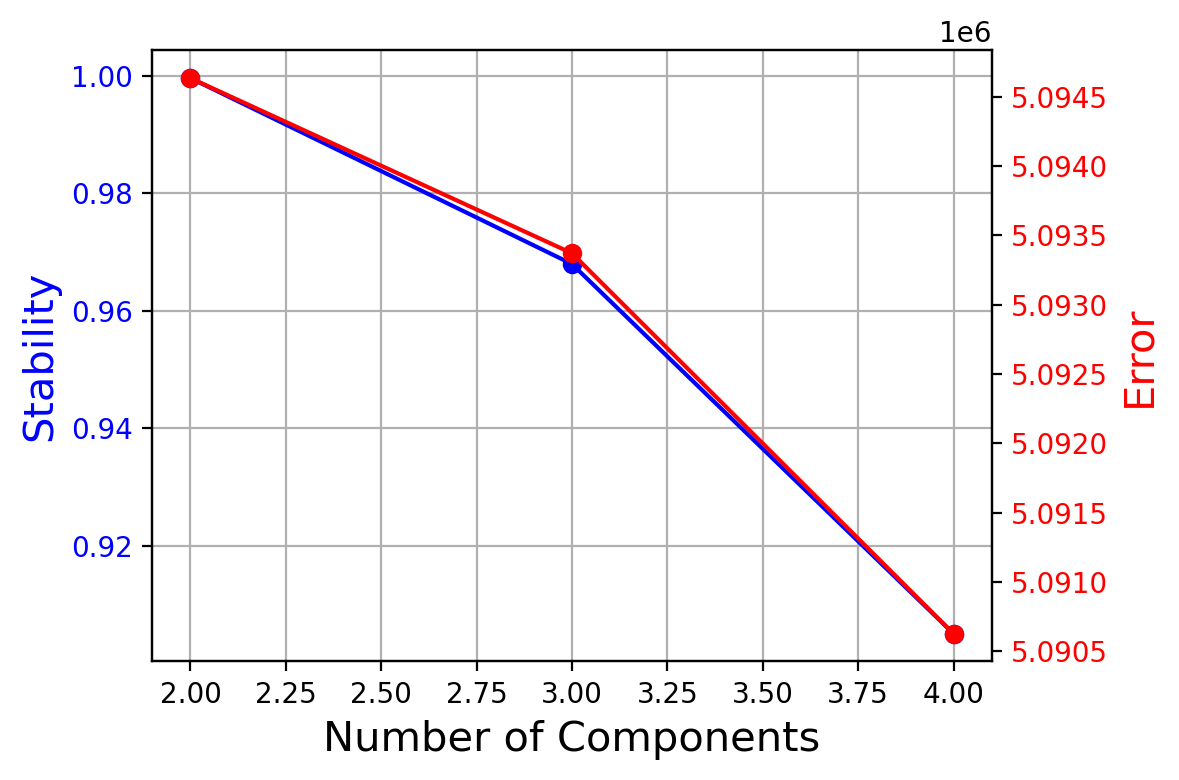

In [24]:
cnmf_obj.k_selection_plot(close_fig=False)

In [25]:
print('This saves the corresponding figure to the following file: %s' % cnmf_obj.paths['k_selection_plot'])

This saves the corresponding figure to the following file: /home/jovyan/jm_jlab/jm_2023/sim/sim1/sim1.k_selection.png


In [26]:
selected_K = 3
density_threshold = 2.00

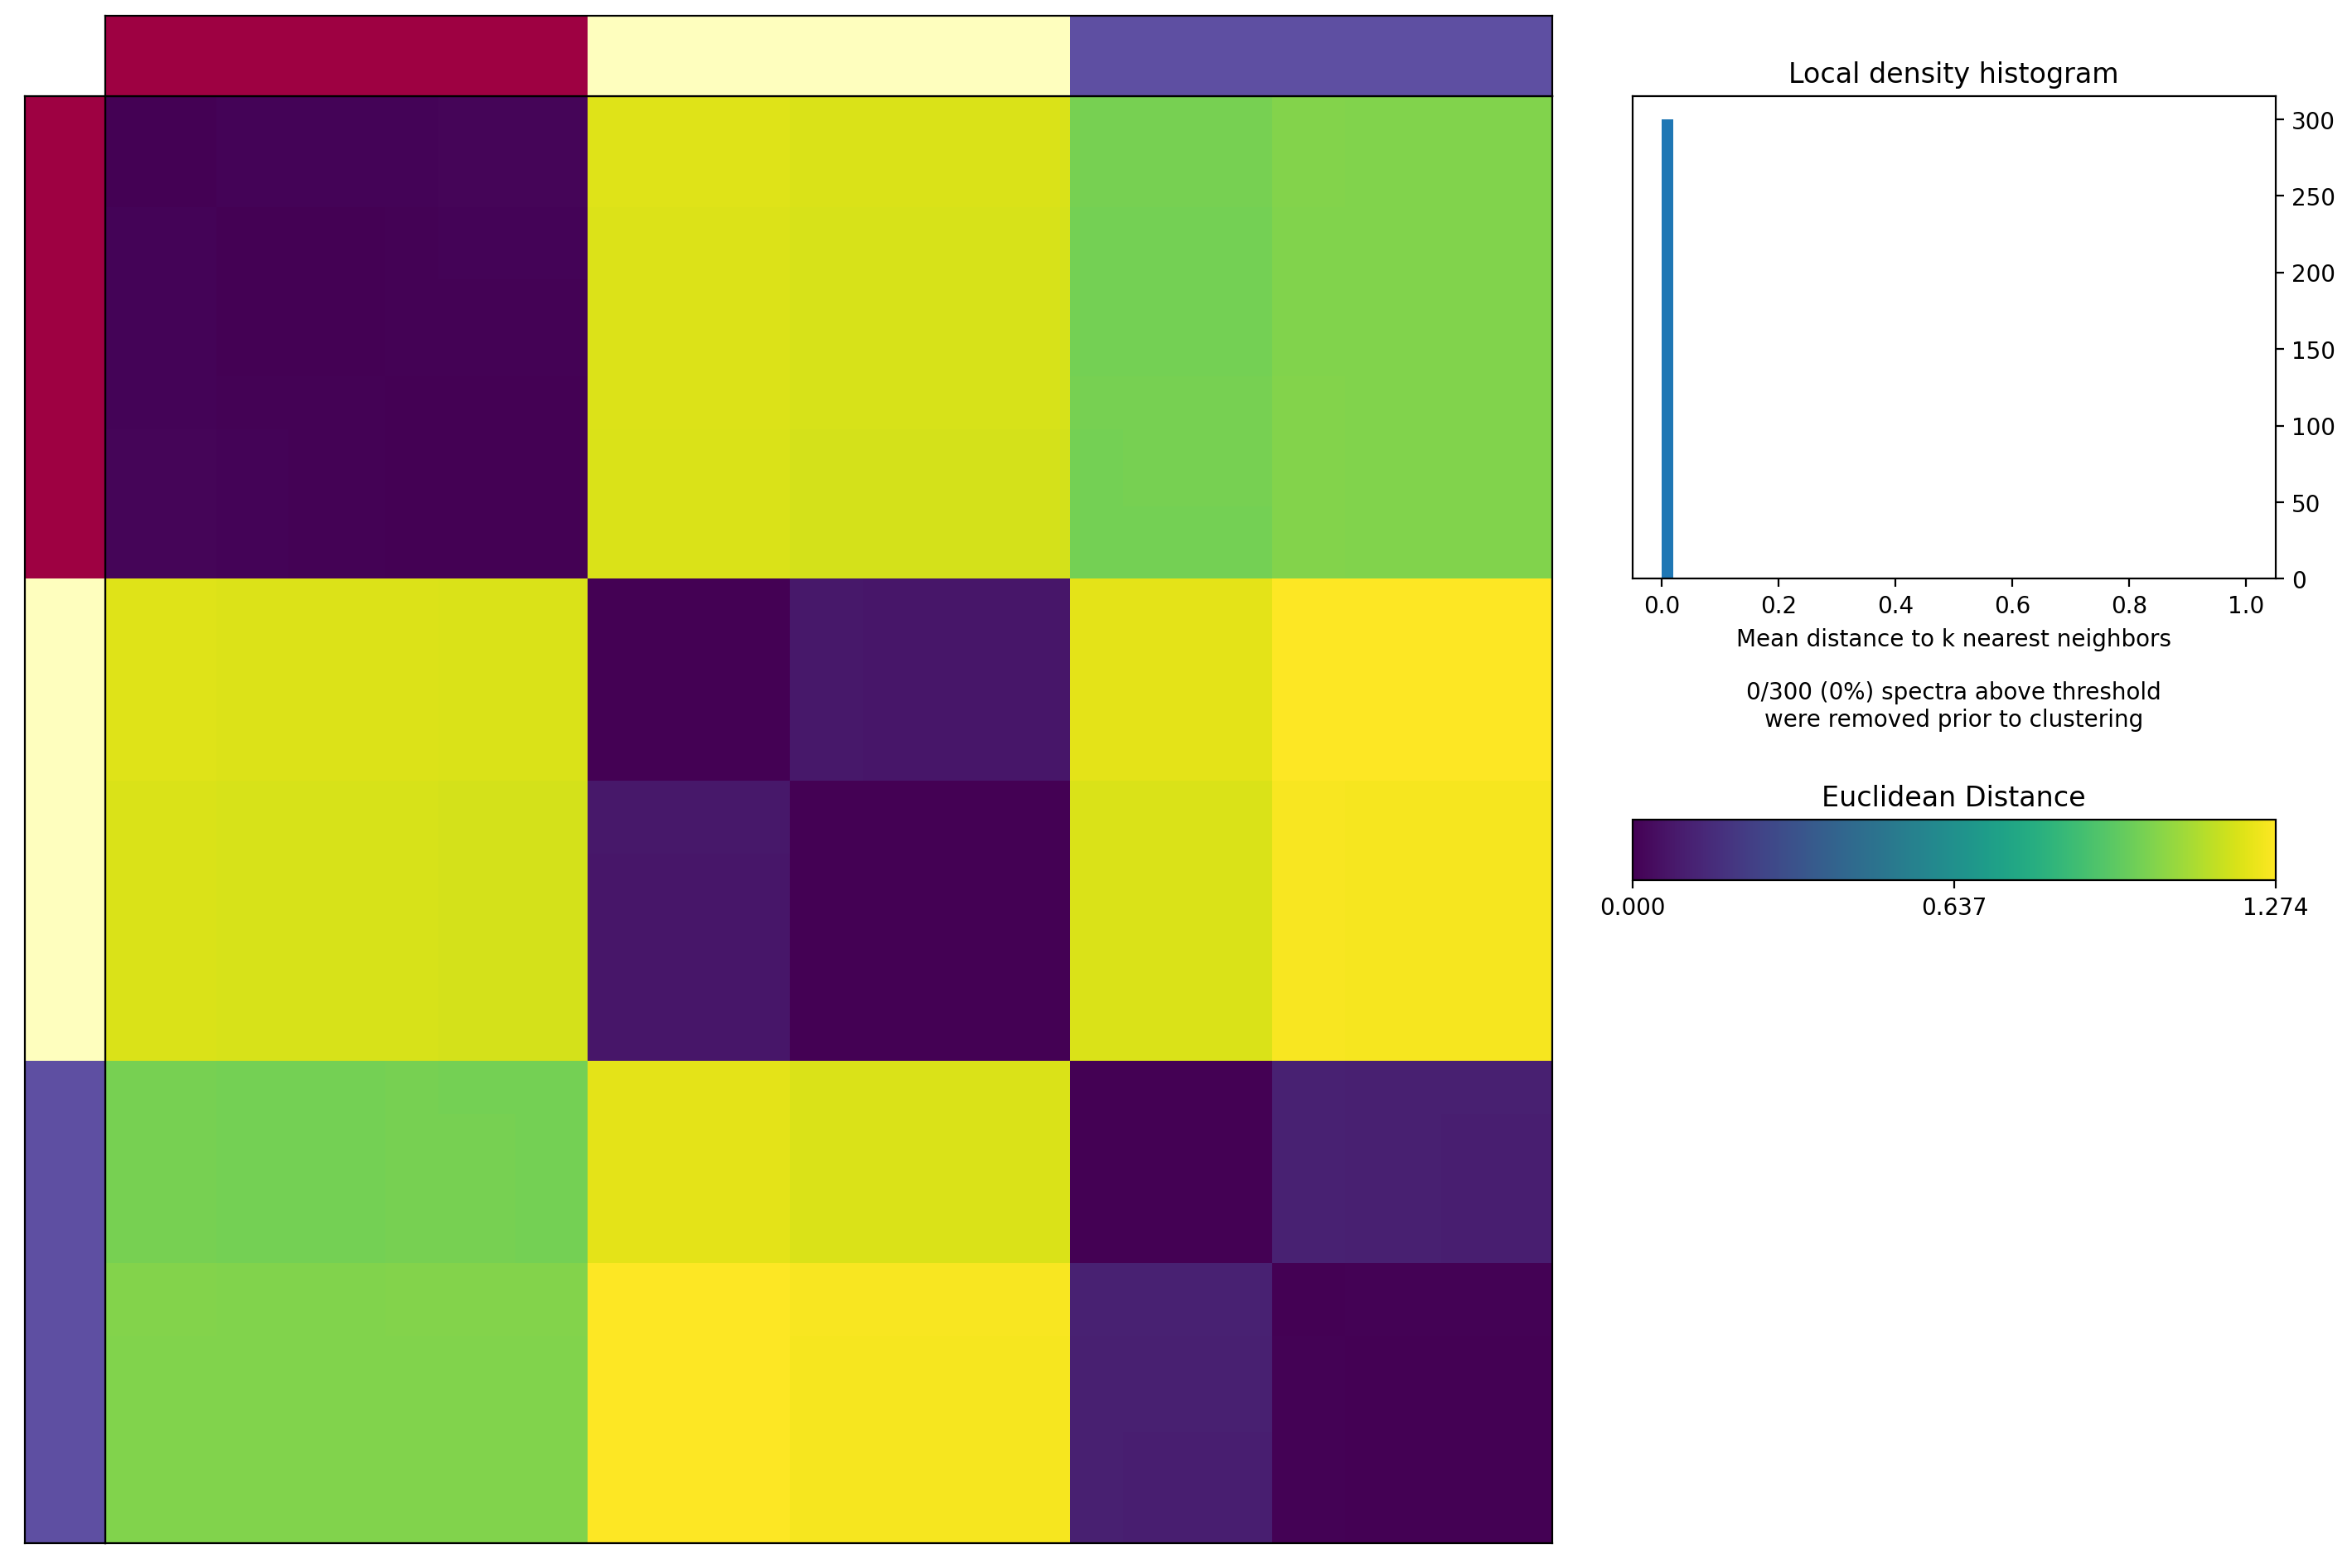

In [27]:
cnmf_obj.consensus(k=selected_K, 
                   density_threshold=density_threshold, 
                   show_clustering=True, 
                   close_clustergram_fig=False, refit_usage=False)

In [28]:
adata = sc.read(countfn)

/root/miniconda/envs/NMF_indNeuro/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [29]:
save_dir = output_directory+"/"+run_name

In [33]:
hvgs = open('/home/jovyan/jm_jlab/jm_2023/sim/sim1/sim1.overdispersed_genes.txt').read().split('\n')

In [34]:
usage_norm, gep_scores, gep_tpm, topgenes = cnmf_obj.load_results(K=selected_K, density_threshold=density_threshold)
usage_norm.columns = ['Usage_%d' % i for i in usage_norm.columns]

In [35]:
print("Number of HVGs used: %d" %len(hvgs))
print("Number of genes per module: %d " %topgenes.shape[0])

Number of HVGs used: 2000
Number of genes per module: 100 


<AxesSubplot:>

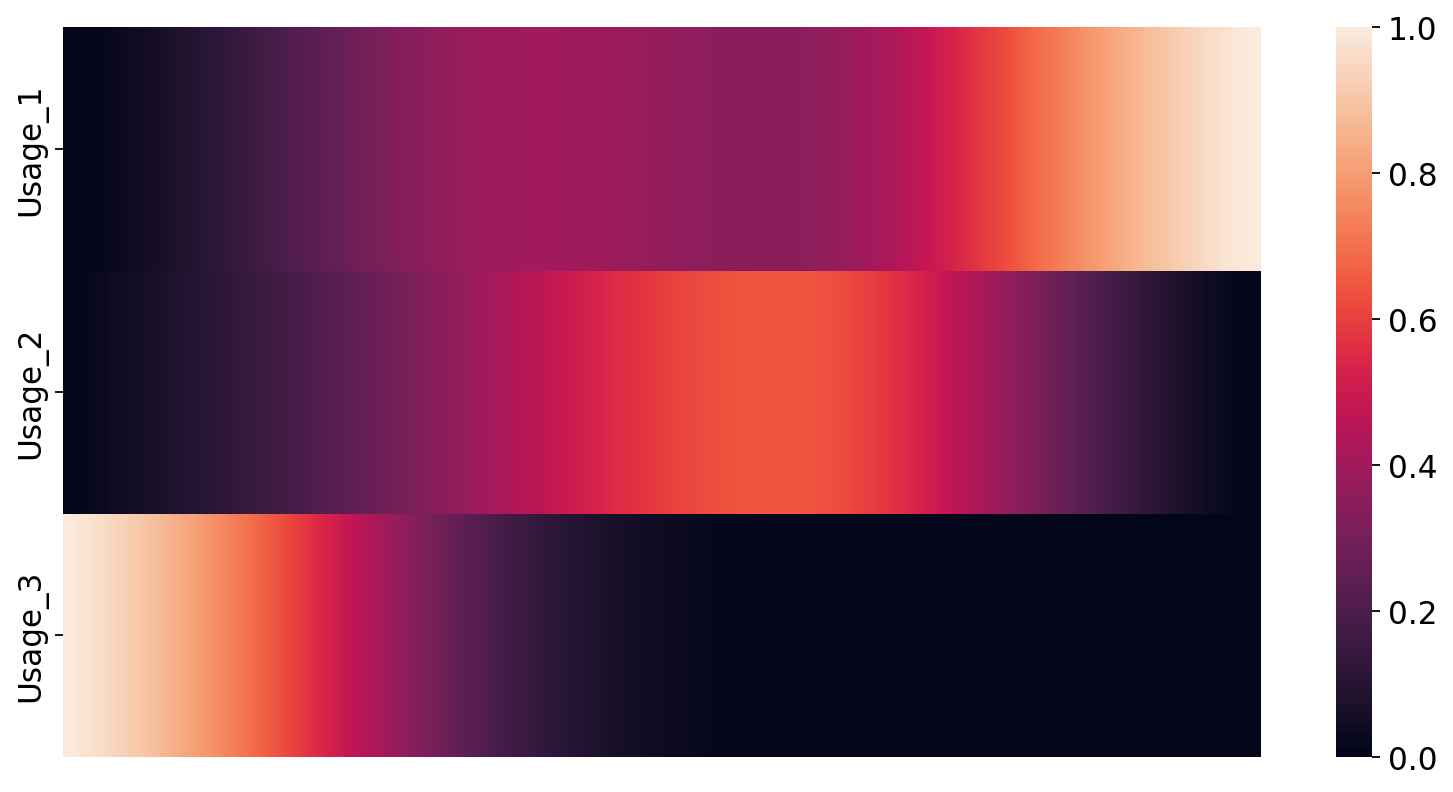

In [36]:
sc.set_figure_params(figsize=(12,6))

sns.heatmap(usage_norm.transpose(), xticklabels=False, yticklabels=True)

In [37]:
#For pseudotemporal ordering in heatmap
usage_norm.rename(columns={'Usage_1':"Module_3", 'Usage_2':"Module_2", 'Usage_3':"Module_1"}, inplace=True)
topgenes.rename(columns={1:"Module_3", 2:"Module_2", 3:"Module_1"}, inplace=True)

In [38]:
usage_norm = usage_norm[['Module_1','Module_2','Module_3']]
topgenes = topgenes[['Module_1','Module_2','Module_3']]

[Text(0.5, 63.666666666666686, 'pseudotime')]

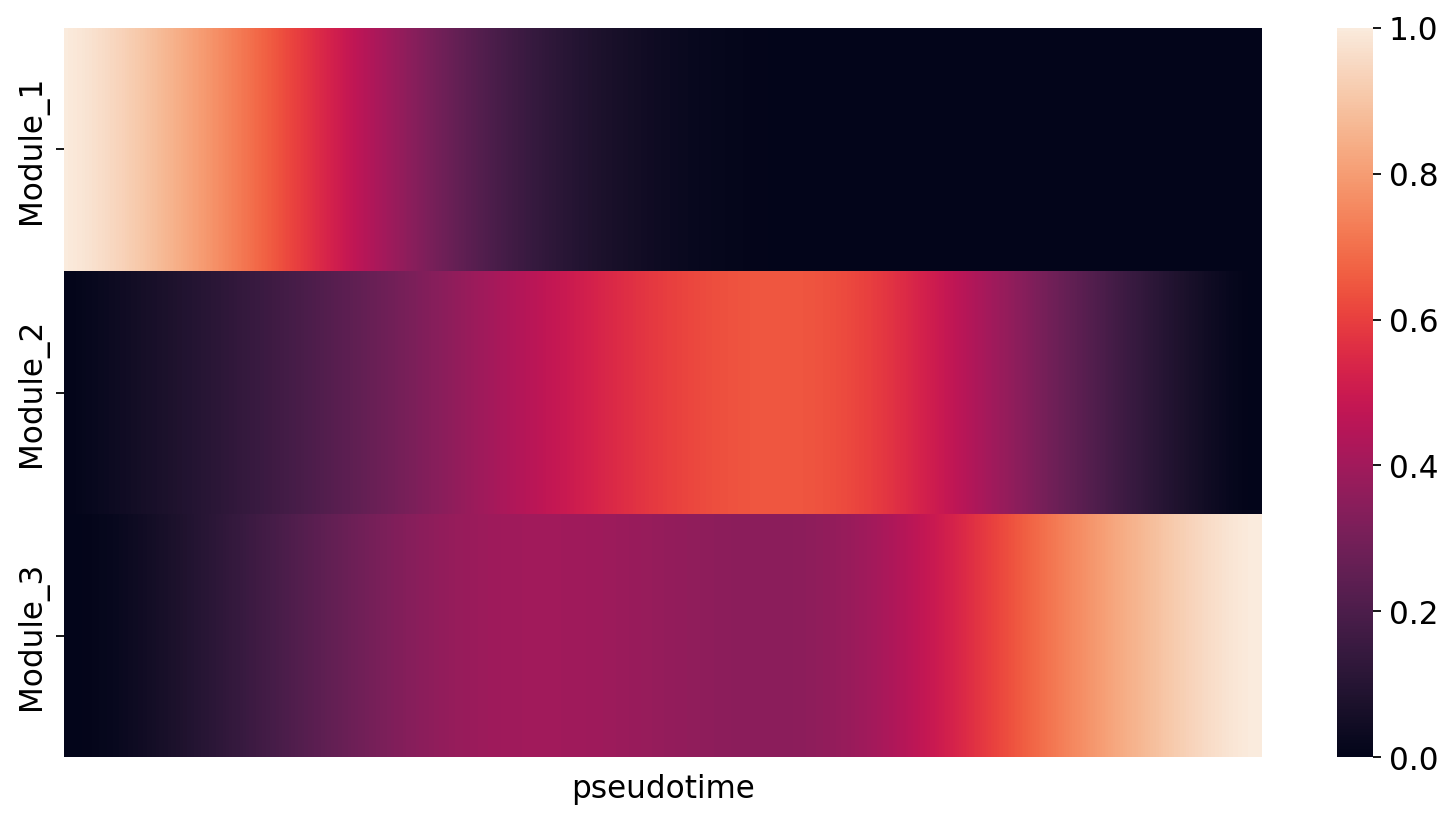

In [39]:
sc.set_figure_params(figsize=(12,6))

pl1 = sns.heatmap(usage_norm.transpose(), xticklabels=False, yticklabels=True)
pl1.set(xlabel="pseudotime") 

### Save results

In [43]:
topgenes.to_csv(save_dir+"/sim_piNMF.tsv", sep='\t', index=False, header=True)

In [44]:
usage_norm.to_csv(save_dir+'sim_piNMF.tsv', sep='\t', index=False, header=True)

### Plot on PCA

In [45]:
usage_norm.index = np.arange(0, usage_norm.shape[0])

In [46]:
tmp = sc.read("/home/jovyan/jm_jlab/data_indNeuro/intermediate_files/simulation.h5ad")

In [47]:
usage_norm.index = for_NMF.obs['cell_id']

In [48]:
#left join
tmp.obs = tmp.obs.join(usage_norm, how='left', lsuffix='l')

In [51]:
tmp.obs['id'] = 'Simulation'

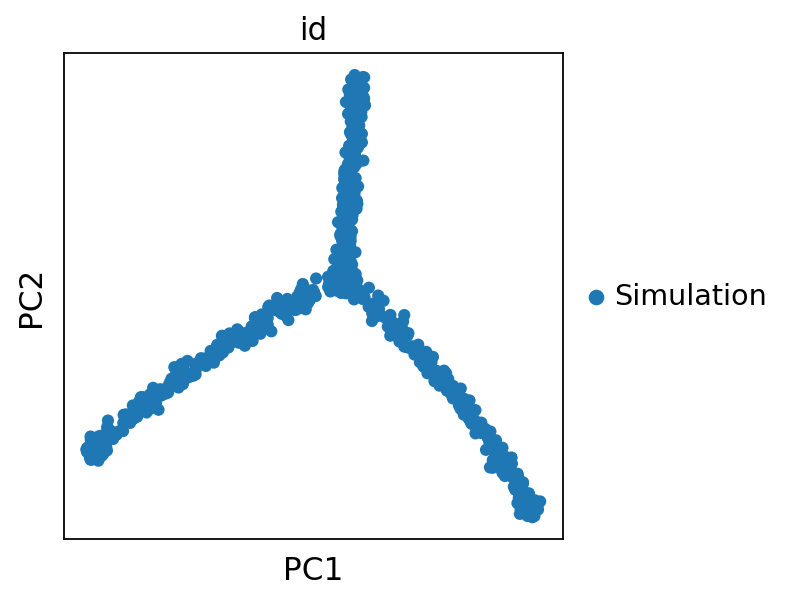

In [52]:
plt.rcParams['figure.figsize'] = (4,4)
plt.rcParams["savefig.dpi"] = 600

sc.pl.pca(tmp, color=['id'])

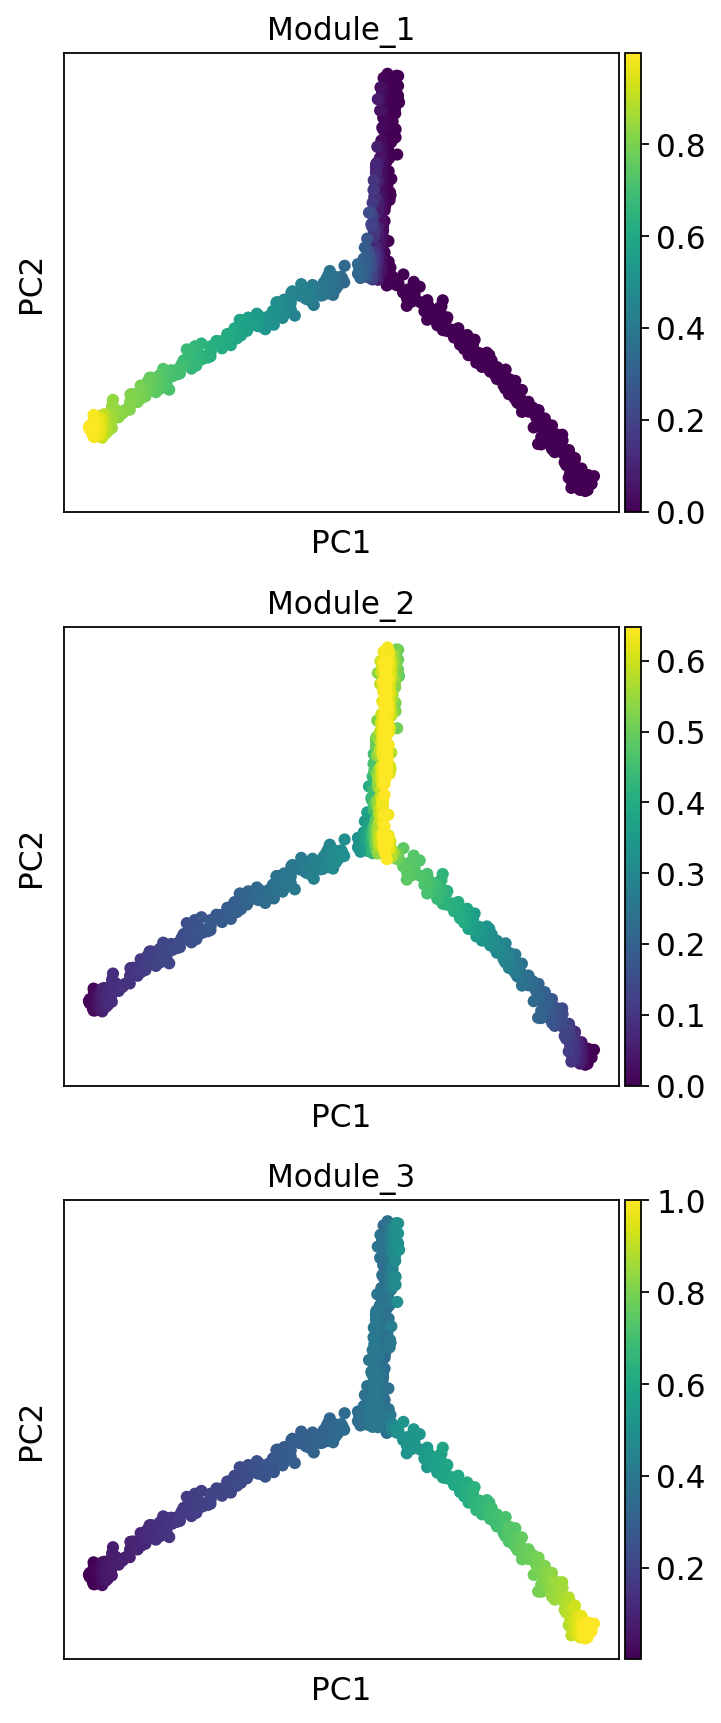

In [49]:
sc.set_figure_params(figsize=(4,4))

sc.pl.pca(tmp, color=usage_norm.columns, ncols=1)#, save='modules_to_oRG_4K_piNMF.png')